In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import re  #regular expression
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
%matplotlib inline

In [ ]:
da = pd.read_csv("GMM.csv")
dataset.shape
dataset.head()

(4131, 5)

,id,Tax District,Front,Depth,Sale Price
0,1,District A,25.75,116.00,1160000.0
1,2,District B,30.50,18.00,198000.0
2,3,District B,90.00,104.40,3366062.0
3,4,District B,17.92,67.33,425000.0
4,5,District B,12.94,99.71,440000.0


In [ ]:
new_columns = {x : re.sub('[^A-Za-z]+','',x) for x in dataset.columns.values}
new_columns
dataset.rename(columns = new_columns,inplace=True)
dataset.rename(columns = {"AnnualIncomek": "AnnualIncome"},inplace=True)

{'id': 'id',
 'Tax District': 'TaxDistrict',
 'Front': 'Front',
 'Depth': 'Depth',
 'Sale Price': 'SalePrice'}

In [ ]:
dataset["TaxDistrict"].value_counts()
dataset["Tax_District_Code"] = dataset["TaxDistrict"].map({"District A" : 0, "District B" : 1})

District B    3298
District A     833
Name: TaxDistrict, dtype: int64

In [ ]:
dataset.drop(columns=["id","TaxDistrict"], inplace=True)

In [ ]:
dataset.head()

,Front,Depth,SalePrice,Tax_District_Code
0,25.75,116.00,1160000.0,0
1,30.50,18.00,198000.0,1
2,90.00,104.40,3366062.0,1
3,17.92,67.33,425000.0,1
4,12.94,99.71,440000.0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Front              4131 non-null   float64
 1   Depth              4131 non-null   float64
 2   SalePrice          4131 non-null   float64
 3   Tax_District_Code  4131 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 129.2 KB


In [ ]:
dataset.describe()

,Front,Depth,SalePrice,Tax_District_Code
count,4131.000000,4131.000000,4.131000e+03,4131.000000
mean,40.014999,116.447620,1.844885e+05,0.798354
std,28.235502,34.189244,2.824550e+05,0.401278
min,10.000000,17.250000,1.000000e+04,0.000000
25%,28.500000,100.000000,5.500000e+04,1.000000
50%,32.000000,114.000000,1.100000e+05,1.000000
75%,42.490000,134.000000,2.250000e+05,1.000000
max,677.000000,347.230000,4.150000e+06,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 833.1, '833')

Text(1.0, 3298.1, '3298')

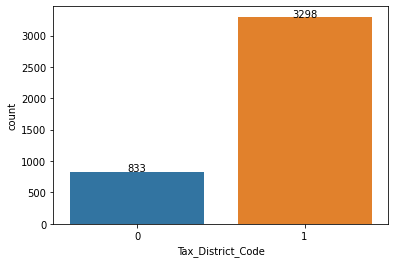

In [ ]:
values = dataset["Tax_District_Code"].value_counts()
ax = sns.countplot(dataset["Tax_District_Code"])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

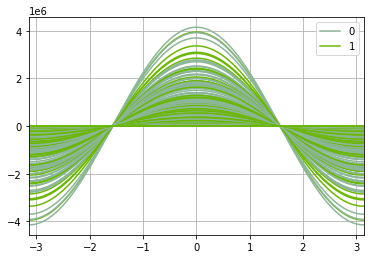

In [ ]:
andrews_curves(dataset, "Tax_District_Code")

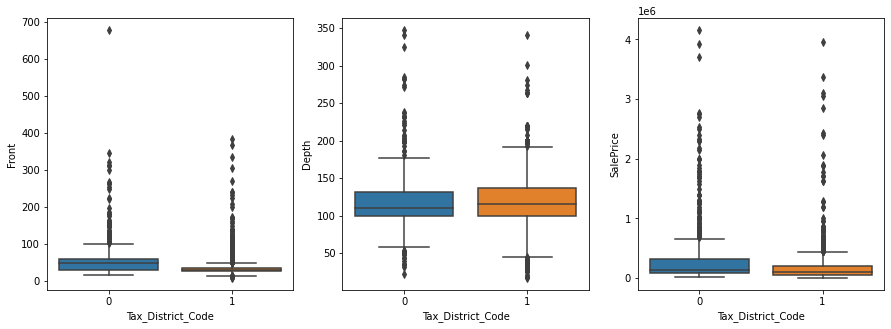

In [ ]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.boxplot(data=dataset, x="Tax_District_Code",y="Front")
ax=plt.subplot(1,3,2)
sns.boxplot(data=dataset, x="Tax_District_Code",y="Depth")
ax=plt.subplot(1,3,3)
sns.boxplot(data=dataset, x="Tax_District_Code",y="SalePrice")

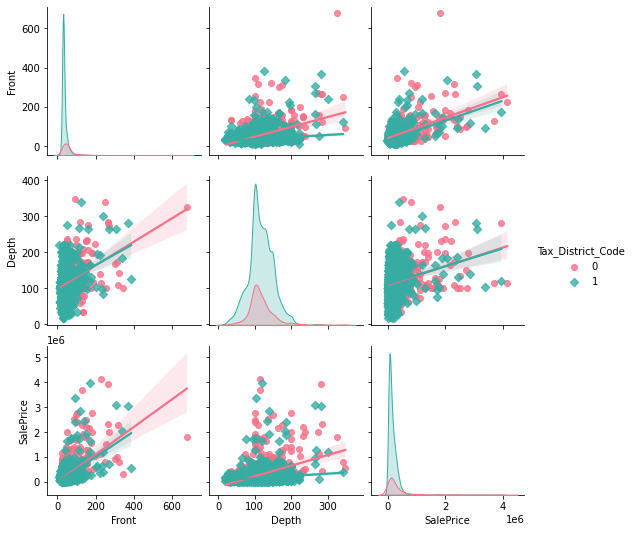

In [ ]:
sns.pairplot(dataset, vars=["Front","Depth","SalePrice"], diag_kind="kde"
             , kind="reg", hue="Tax_District_Code", markers=["o","D"],palette="husl")

In [ ]:
dataset_NoGender = dataset.copy() #Deep Copy
dataset_NoGender.drop(columns=["Tax_District_Code"], inplace = True)
#dataset.head()
dataset_NoGender.head()

,Front,Depth,SalePrice
0,25.75,116.00,1160000.0
1,30.50,18.00,198000.0
2,90.00,104.40,3366062.0
3,17.92,67.33,425000.0
4,12.94,99.71,440000.0


In [ ]:
ss= StandardScaler()
ss.fit(dataset_NoGender)
X = ss.transform(dataset_NoGender)

StandardScaler()

In [ ]:
gm = GaussianMixture(
                     n_components = 3,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


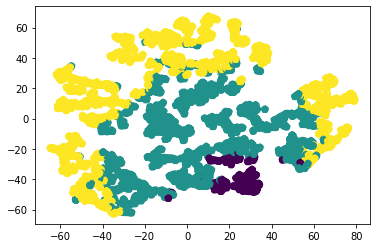

In [ ]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='*',
            s=10,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )

GaussianMixture(n_components=2, n_init=10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


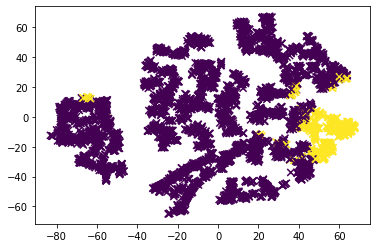

In [ ]:
gm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=50,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )
